__Author: Christian Camilo Urcuqui López__

__Date: 15 may 2019__


# Fuzzy Logic

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/Fuzzy_logic_temperature_en.svg/1200px-Fuzzy_logic_temperature_en.svg.png" width="350">


It is a methodolody where its sets are not clear, due this the "truthiness" can be expresed over a continuum, in other words,  something is not totally true or false, they are partically true or partically false.

A _fuzzy variable_ has a _crisp value_ which takes on some value over a pre-defined domain (__universe__). This has several _terms_ that are used to describe it, for example some categorical characteristics like "poor", "mediocre", and "good". Each term has a membership function that defines who crisp value is on a scale of 0 to 1.

Moveover, we have a _fuzzy control system_ which links fuzzy variables using a set of _rules_. These rules are sumply mapping that describes how one or more fuzzy variables relates to another (they are noted in terms of an IF-THEN). Each rule has its _antecedent_ and its _consequent_.


<img src="https://pythonhosted.org/scikit-fuzzy/_static/img/logo.png" width="150">


Scikit-Fuzzy is a collection of fuzzy logic algorithms based on SciPy Stack

## The Tipping Problem - The Hard Way

These are the input variables:
+ __quality__: Quality of the food
+ __service__: Quality of the service

This is the output variable is simply the tip amount, in percentage points:
+ __tip__: Percent of bill to ad as tip

For this example, let's say we need 'high', 'medium', and 'low' membership functions for both input variables and our output variable. 


Generate universe variables
+ Quality and service on subjective ranges [0,10]
+ Tip has a range of [0,25] in units of percentage points


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip = np.arange(0, 26, 1)

Generate fuzzy membership functions

In [6]:
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

Let's visualuze these universe and membership functions

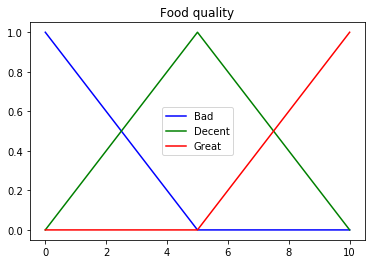

In [14]:
plt.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
plt.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
plt.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
plt.title(('Food quality'))
plt.legend()
plt.show()

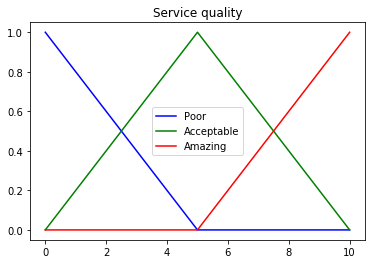

In [16]:
plt.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
plt.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
plt.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
plt.title(('Service quality'))
plt.legend()
plt.show()

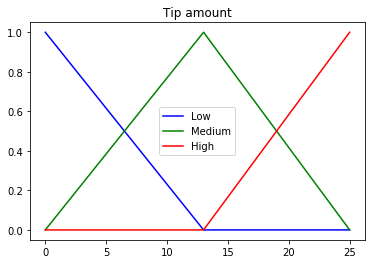

In [17]:
plt.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
plt.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
plt.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
plt.title(('Tip amount'))
plt.legend()
plt.show()

__Fuzzy rules__

Let's use the fuzzy relationship between input and output variables. We are going to consider the next three rules:
+ If the food is bad OR the service is poor, then the tip will be low
+ If the service is acceptable, then the tip will be medium
+ If the food is great OR the service is amazing, then the tip will be high.

__Rule application__

What would the tip be in the following circumstance:
+ Food quality was 6.5
+ Service was 9.8


We need the activation of our fuzzy membership functions at these values, the exact values 6.5 and 9.8 do not exist on our universes, that is where fuzz.interp_membership exists

In [19]:
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, 6.5)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, 6.5)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, 6.5)

serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, 9.8)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, 9.8)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, 9.8)

Now we are going to apply our rules.

_Rule 1_

it concerns bad food OR service. The OR operator means we take the maximum of these two

In [20]:
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

Now we apply this by clipping the top off the corresponding output membership function with `np.fmin`

In [21]:
tip_activation_lo = np.fmin(active_rule1, tip_lo)

_Rule 2_

If the service is acceptable, then the tip will be medium

In [24]:
tip_activation_md = np.fmin(serv_level_md, tip_md)

_Rule 3_

If the food is great OR the service is amazing, then the tip will be high

In [22]:
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)

In [26]:
tip0 = np.zeros_like(x_tip)

let's visualize this

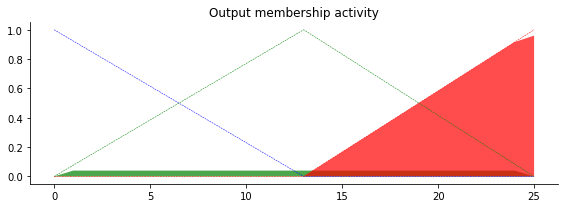

In [25]:
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

__Rule aggregation__

With the activity of each output membership function known, all output membership functions must be combined. This is typically done using a maximum operator

In [28]:
aggregated = np.fmax(tip_activation_lo, np.fmax(tip_activation_md, tip_activation_hi))

__Defuzzification__

We return to crisp logic from the world of fuzzy membership functions. For the purposes of this example the centroid method will be used

In [29]:
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot

Visualize this

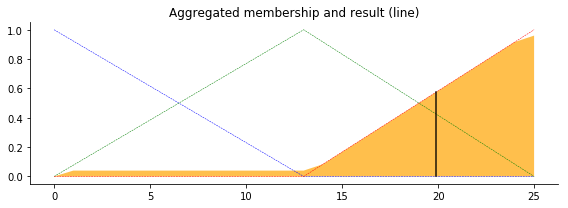

In [30]:
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

The result is a tip of 20.2%.

## References

+ https://pythonhosted.org/scikit-fuzzy/userguide/fuzzy_control_primer.html#overiveiw-and-terminology
+ https://pythonhosted.org/scikit-fuzzy/api/api.html